In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from data_loader import data_loader
import librosa
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
CLASSES6 = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad']
CLASSES7 = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [ ]:
# Load the model.
model = hub.load('https://tfhub.dev/google/yamnet/1')

In [ ]:
dl = data_loader(
    Crema_path='../Datasets/Crema/',
    Ravdess_path='../Datasets/Ravdess/',
    Savee_path='../Datasets/Savee/',
    Tess_path='../Datasets/Tess/'
)

In [ ]:
def get_embeddings(filename, label):
    data, sr = librosa.load(filename, sr=None, mono=True, res_type='kaiser_best')

    if sr != 16000:
        data = librosa.resample(y=data, orig_sr=sr, target_sr=16000, res_type='kaiser_best')

    _, embeddings, log_mel = model(data)
    num_embeddings = tf.shape(embeddings)[0]
    return embeddings, tf.repeat(label, num_embeddings), log_mel

In [ ]:
tess = dl.get_tess_df()
savee = dl.get_savee_df()
ravdess = dl.get_ravdess_df()
crema = dl.get_crema_df()
all_en = dl.get_all_df()

In [ ]:
def save_embeddings(df, filename):
    features = []
    labels = []

    if df['Emotion'].nunique() == 6:
        classes = CLASSES6
    else:
        classes = CLASSES7

    for index, row in tqdm(df.iterrows(), total=df.shape[0]):
        embs, label = get_embeddings(row['File_Path'], row['Emotion'])
        assert(len(embs) == len(label))
        for i in range(embs.shape[0]):
            features.append(embs[i])
            labels.append(classes.index(label[i]))
    
    features = np.array(features)
    labels = np.array(labels)
    np.save(filename + 'X.npy', features)
    np.save(filename + 'y.npy', labels)

In [ ]:
# save_embeddings(tess, './features/vggish_emb/tess/')

In [ ]:
# save_embeddings(savee, './features/vggish_emb/savee/')

In [ ]:
# save_embeddings(ravdess, './features/vggish_emb/ravdess/')

In [ ]:
# save_embeddings(crema, './features/vggish_emb/crema/')

In [ ]:
# save_embeddings(all_en, './features/vggish_emb/all/')

# Testing

In [ ]:
# X = np.load('./features/vggish_emb/savee/X.npy', allow_pickle=True)
# y = np.load('./features/vggish_emb/savee/y.npy', allow_pickle=True)

In [ ]:
# X.shape, y.shape

In [ ]:
# X[200]

In [ ]:
# y[200]

# Spectogram

In [56]:
from math import ceil


def plot_embeddings(df, name):

    if df['Emotion'].nunique() == 6:
        classes = CLASSES6
    else:
        classes = CLASSES7

    fig, axs = plt.subplots(2, ceil(len(classes) / 2), figsize=(15, 6), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .3, wspace=.3)
    fig.suptitle(f'{name} Yamnet Embeddings')
    fig.tight_layout()
    axs = axs.ravel()

    for i in range(len(classes)):
        emb,_,log_mel = get_embeddings(df[df['Emotion'] == classes[i]]['File_Path'].iloc[0], df[df['Emotion'] == classes[i]]['Emotion'].iloc[0])
        # axs[i].imshow(log_mel.numpy().T, aspect='auto', interpolation='nearest', origin='lower', cmap='jet')
        axs[i].plot(emb[0])
        axs[i].set_title(classes[i])

def plot_mel(df, name):

    if df['Emotion'].nunique() == 6:
        classes = CLASSES6
    else:
        classes = CLASSES7

    fig, axs = plt.subplots(2, ceil(len(classes) / 2), figsize=(15, 6), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .3, wspace=.3)
    fig.suptitle(f'{name} Yamnet Log Mel Spectrogram')
    fig.tight_layout()
    axs = axs.ravel()

    for i in range(len(classes)):
        emb,_,log_mel = get_embeddings(df[df['Emotion'] == classes[i]]['File_Path'].iloc[0], df[df['Emotion'] == classes[i]]['Emotion'].iloc[0])
        axs[i].imshow(log_mel.numpy().T, aspect='auto', interpolation='nearest', origin='lower', cmap='jet')
        axs[i].set_title(classes[i])

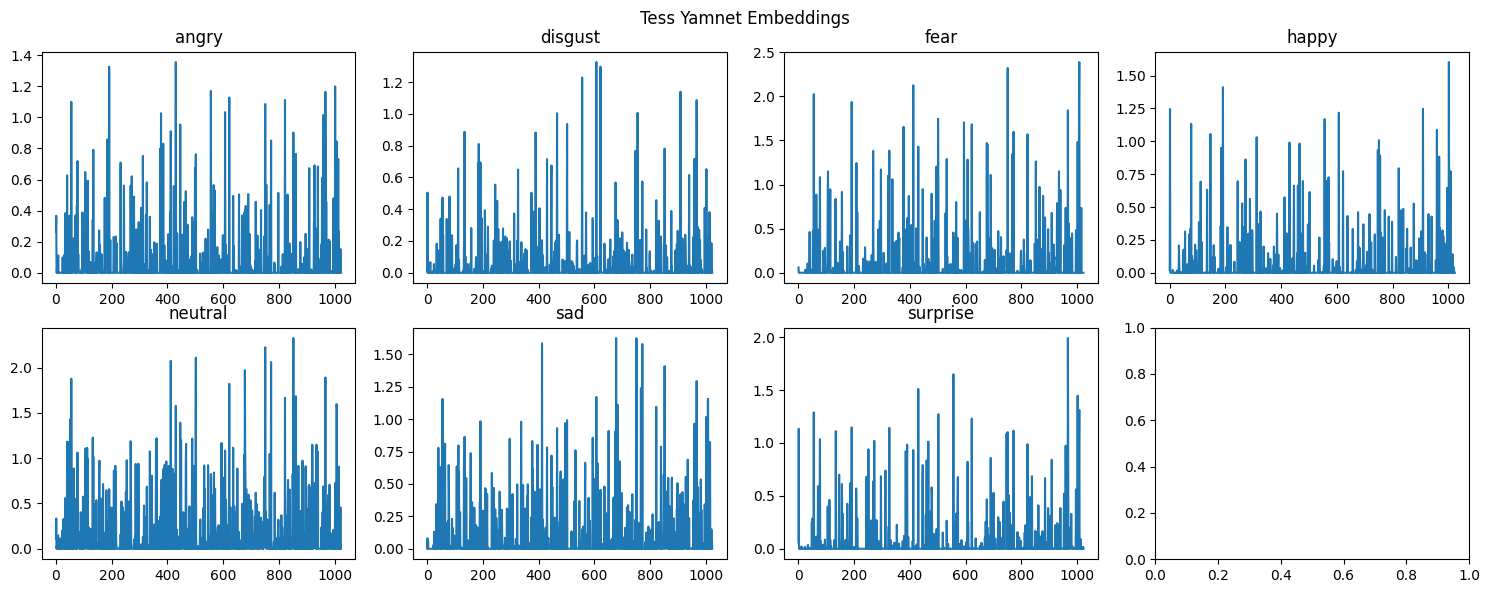

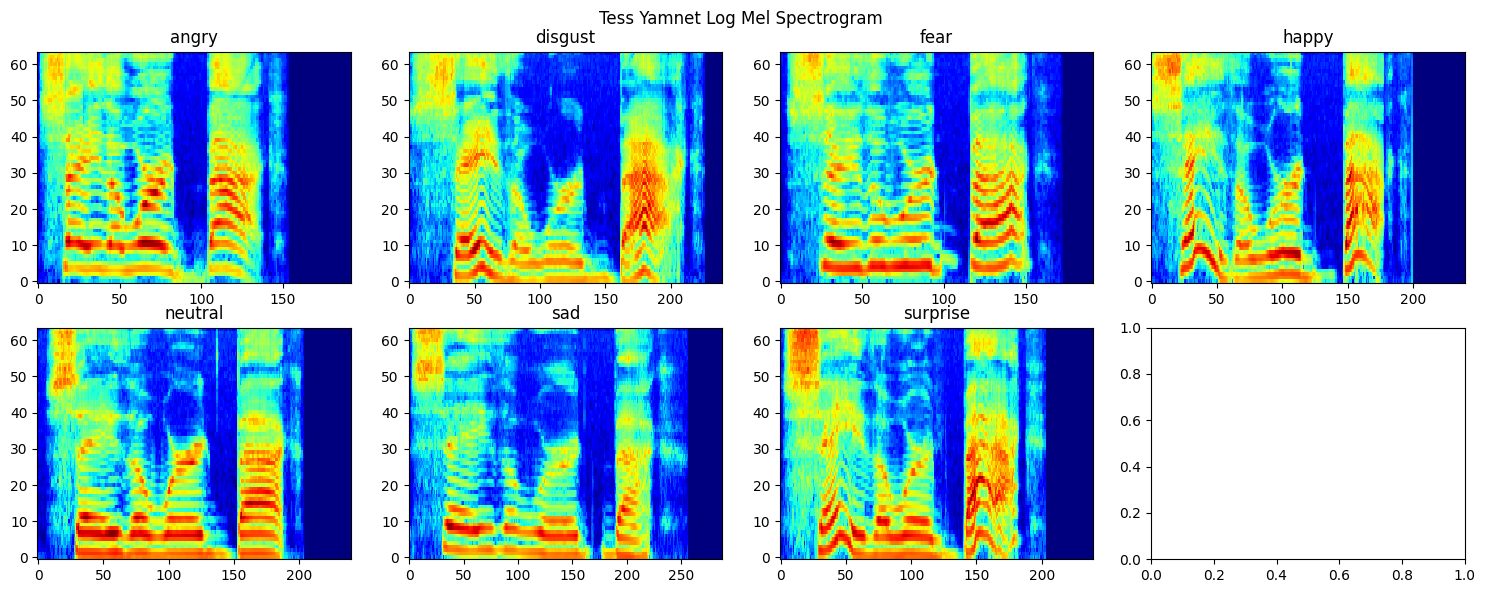

In [57]:
plot_embeddings(tess, 'Tess')
plot_mel(tess, 'Tess')

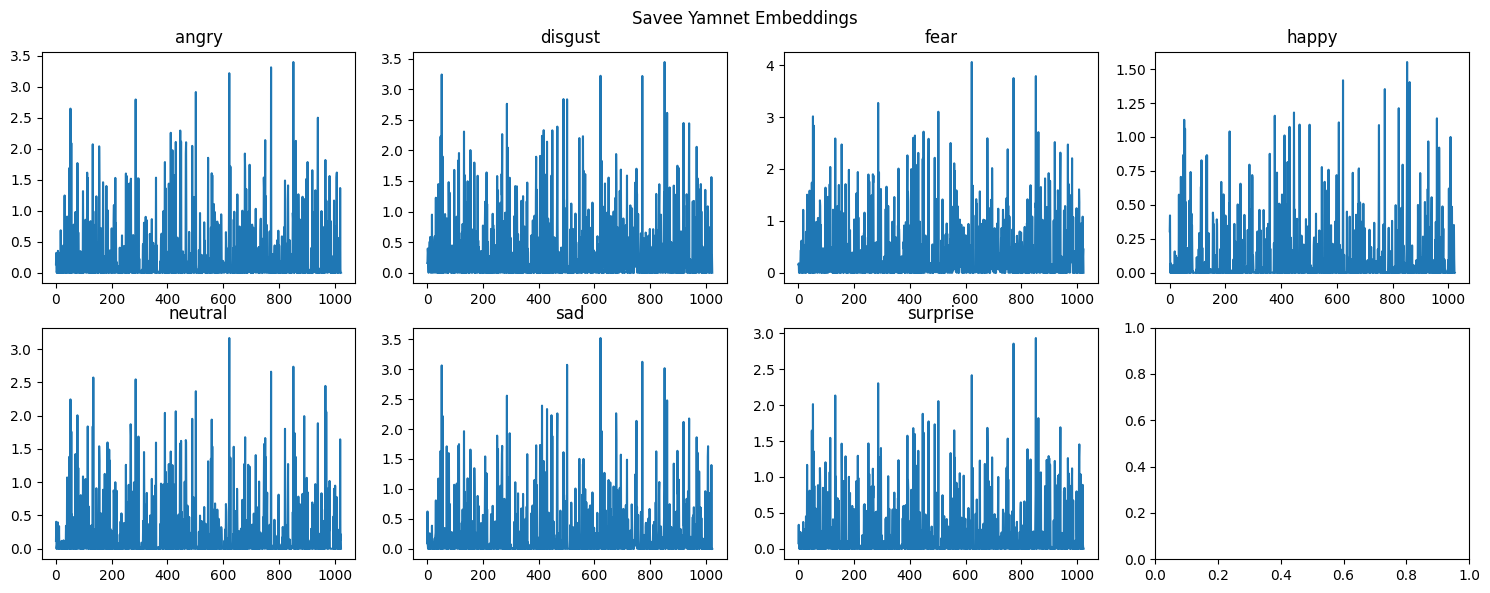

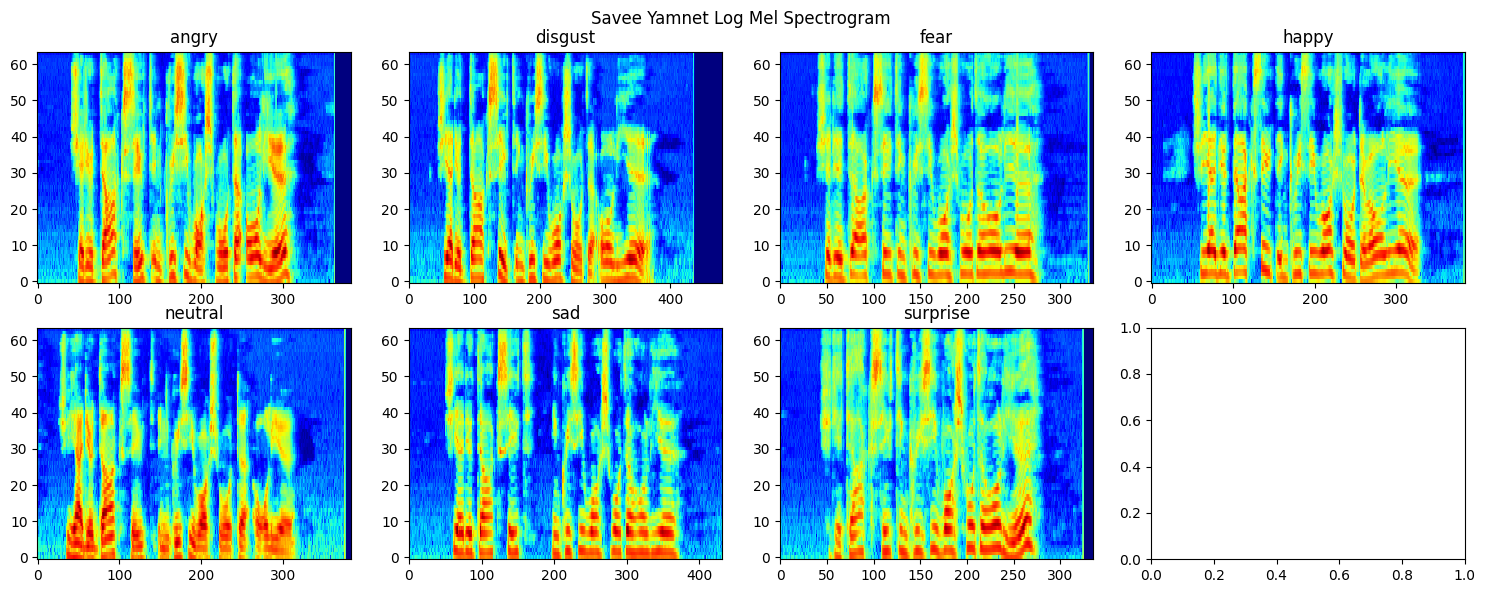

In [58]:
plot_embeddings(savee, 'Savee')
plot_mel(savee, 'Savee')

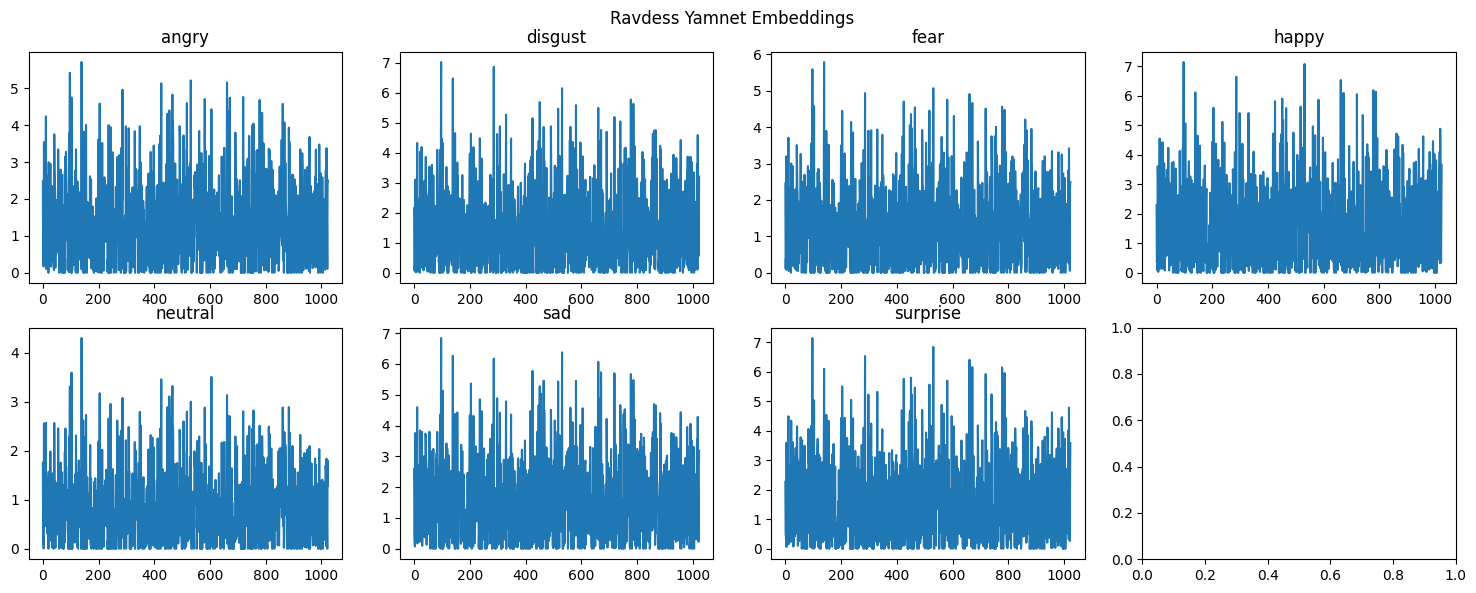

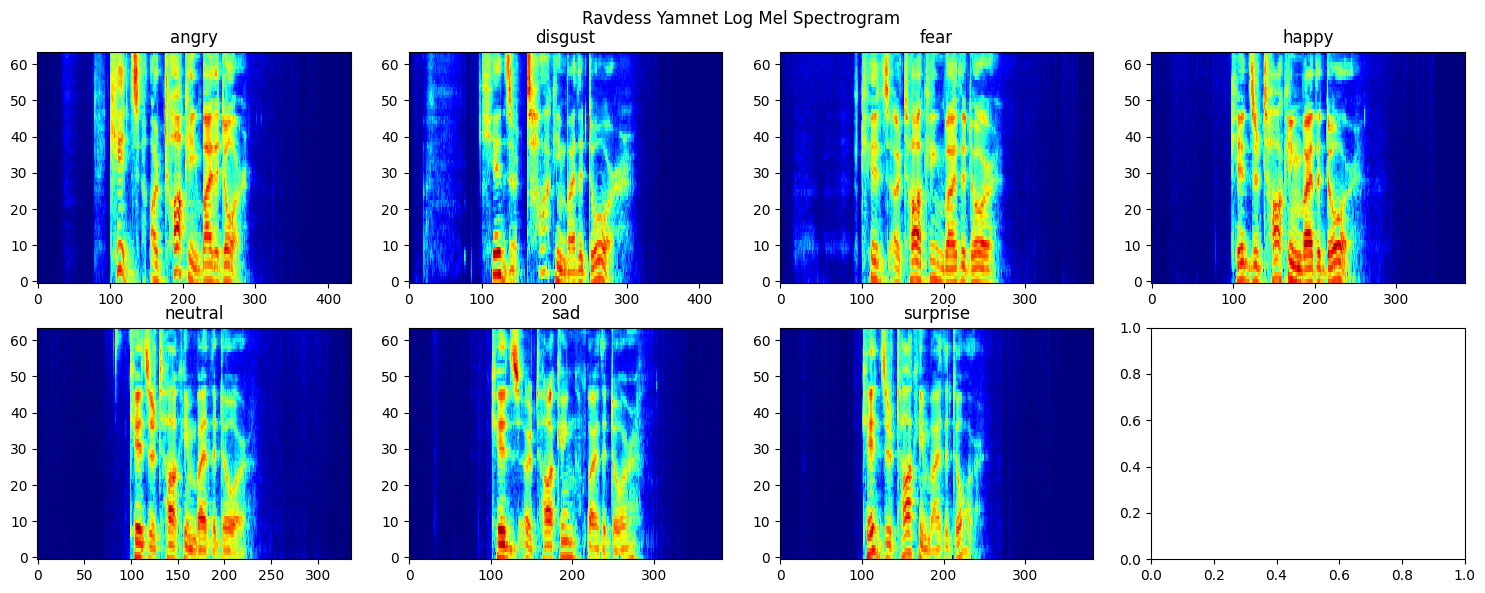

In [60]:
plot_embeddings(ravdess, 'Ravdess')
plot_mel(ravdess, 'Ravdess')

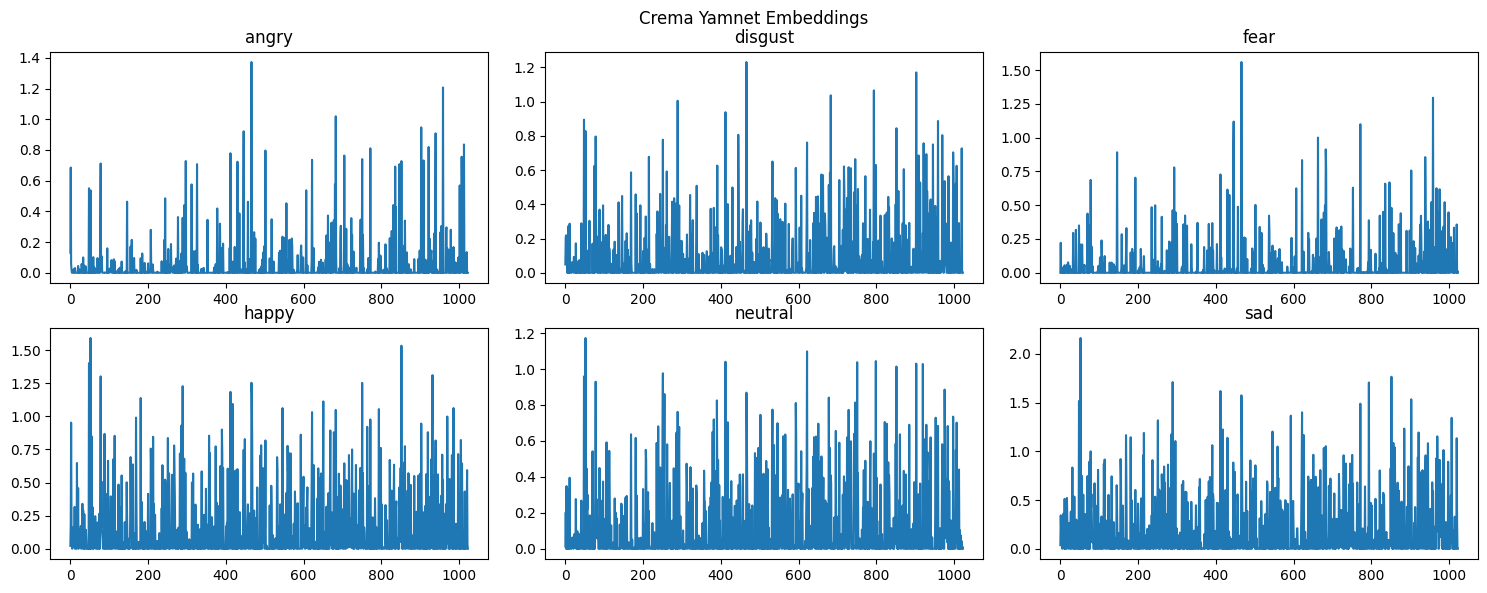

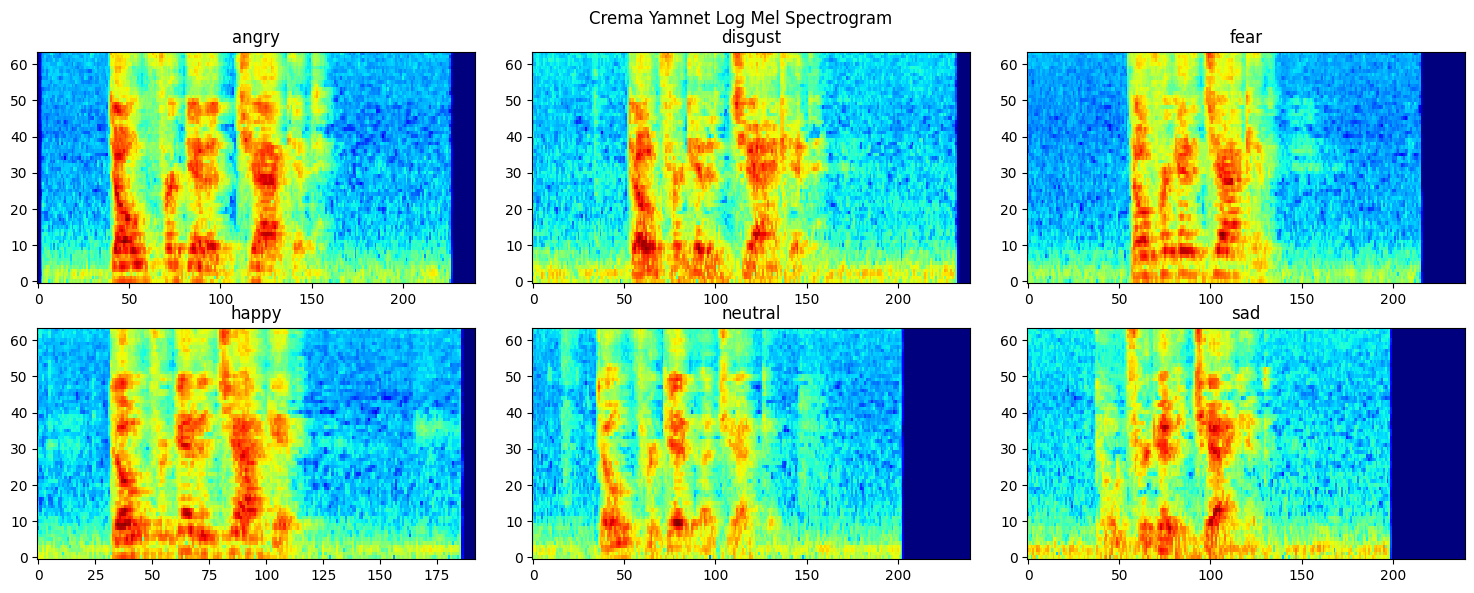

In [61]:
plot_embeddings(crema, 'Crema')
plot_mel(crema, 'Crema')